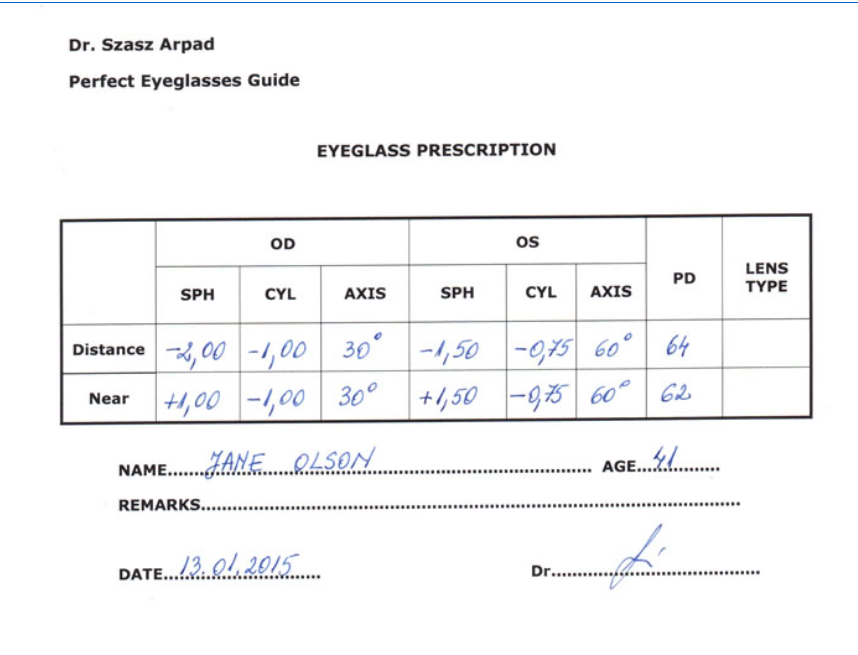

In [1]:
import cv2
import math
import numpy as np
import imutils
import subprocess
from IPython.display import Image

inputFile = "Capture.png"
Image(filename='/Users/anudh/OneDrive/Desktop/eye/' + inputFile)

In [10]:
import cv2 # An image proccessing library
import pytesseract # an image to text library
import numpy as np
import os
import traceback
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
#for file in os.listdir("C:/Users/anudh/OneDrive/Desktop/eye/"):
img = cv2.imread(r'C:/Users/anudh/OneDrive/Desktop/eye/Capture.png')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray, img_bin = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
gray = cv2.bitwise_not(img_bin)
kernel = np.ones((2, 1), np.uint8)
img = cv2.erode(gray, kernel, iterations=1)
img = cv2.dilate(img, kernel, iterations=1)
print(pytesseract.image_to_string(img))

Dr. Szasz Arpad

Perfect Eyeglasses Guide

EYEGLASS PRESCRIPTION

 

   

OATE... :



In [ ]:
img = cv2.imread("/Users/anudh/OneDrive/Desktop/eye/" + inputFile)

In [ ]:
import pandas as pd
df=pd.DataFrame("No","name","Dr","Date","")
for file in os.listdir("C:/Users/anudh/OneDrive/Desktop/eye/"):
    


In [ ]:
import requests
import json
import io
import re
import csv
import string
import dateutil.parser as dparser

def ocr_space_file(filename, overlay=False, api_key='18085fe6ab88957', language='eng'):
    payload = {'isOverlayRequired': overlay,
               'apikey': api_key,
               'language': language,
               }
    with open(filename, 'rb') as f:
        r = requests.post('https://api.ocr.space/parse/image',
                          files={filename: f},
                          data=payload,
                          )
    m = r.content.decode()
    jsonstr = json.loads(m)
    print(jsonstr["ParsedResults"][0]["ParsedText"])
    # Writing data into JSON
    try:
        to_unicode = unicode
    except NameError:
        to_unicode = str

    # Write JSON file
    with io.open('data_ocr_space.json', 'w', encoding='utf8') as outfile:
        str_ = json.dumps(jsonstr, indent=4, sort_keys=True, separators=(',', ': '), ensure_ascii=False)
        outfile.write(to_unicode(str_))

    # Read JSON file
with open('data_ocr_space.json') as data_file:
    data_loaded = json.load(data_file)

text = data_loaded["ParsedResults"][0]["ParsedText"]
text_output = open('outputbase_1.txt', 'w')
text_output.write(text)
text_output.close()

file = open('outputbase_1.txt', 'r')
text = file.read()
#print(text)

# Initializing data variable
name = None
Dr = None
dob = None
Expiry Date = None
nameline = []
dobline = []
Drline = []
text0 = []
text1 = []
text2 = []

# Searching for PAN
lines = text.split('\n')
for lin in lines:
    s = lin.strip()
    s = s.rstrip()
    s = s.lstrip()
    text1.append(s)

text1 = list(filter(None, text1)) # Attribute has to be converted into a list object before any additional processing
#print(text1) #at this operation the new line strings become a list of strings

lineno=0 # to start from the first line of the text file.

for wordline in text1:
    xx = wordline.split('\n')
    if ([w for w in xx if re.search('(|Hospital|Dr|Patient|dob|Expiry|Date)$', w)]):
        text1 = list(text1)
        lineno = text1.index(wordline)
        break

#text1 = list(text1)
text0 = text1[lineno+1:]
#print(text0) #Contains all the relevant extracted text in form of a list - uncomment to check

try:
    for x in text0:
        for y in x.split():
            nameline.append(x)
            break
except:
    pass

try:
    name = nameline[0]
    Patientname = nameline[1]
    Age = nameline[2]
    Expiry = nameline[4]
except:
    pass

# Making tuples of data
data = {}
data['Name'] = name
data['Patientname'] = Patientname
data['Age'] = Age
data['Expiry'] = Expiry

# Writing data into JSON
try:
    to_unicode = unicode
except NameError:
    to_unicode = str

# Write JSON file
with io.open('data_final.json', 'w', encoding='utf8') as outfile:
    str_ = json.dumps(data, indent=4, sort_keys=True, separators=(',', ': '), ensure_ascii=False)
    outfile.write(to_unicode(str_))

# Read JSON file
with open('data_final.json') as data_file:
    data_loaded = json.load(data_file)

#print(data == data_loaded)

# Reading data back JSON(give correct path where JSON is stored)
with open('data_final.json', 'r') as f:
    ndata = json.load(f)

ocr_space_file(filename='pancard_1.jpg', language='eng')

print('\t', "|+++++++++++++++++++++++++++++++|")
print('\t', '|', '\t', ndata['Name'])
print('\t', "|-------------------------------|")
print('\t', '|', '\t', ndata['Patientname'])
print('\t', "|-------------------------------|")
print('\t', '|', '\t', ndata['Age'])
print('\t', "|-------------------------------|")
print('\t', '|', '\t', ndata[''])
print('\t', "|+++++++++++++++++++++++++++++++|")
